In [ ]:
import pandas as pd
from scipy.stats import friedmanchisquare

# Data AUC per kernel dan model (5 run masing-masing)
lenet_data = pd.DataFrame({
    'Gabor': [0.859093, 0.860898, 0.848928, 0.857827, 0.858938],
    'Gaussian': [0.873934, 0.871489, 0.857221, 0.871074, 0.863961],
    'Laplacian': [0.816248, 0.816583, 0.803696, 0.809344, 0.810350],
    'Nonkernel': [0.679617, 0.693544, 0.672608, 0.676987, 0.686309],
    'Sobel': [0.837521, 0.833959, 0.820097, 0.835513, 0.839009]
})

siamese_data = pd.DataFrame({
    'Gabor': [0.922582, 0.915660, 0.920118, 0.913041, 0.920680],
    'Gaussian': [0.930872, 0.931538, 0.929680, 0.929863, 0.928790],
    'Laplacian': [0.88593835, 0.88540498, 0.88998406, 0.89087854, 0.89011797],
    'Nonkernel': [0.929645, 0.928390, 0.927050, 0.923178, 0.922587],
    'Sobel': [0.921906, 0.916932, 0.921716, 0.927486, 0.916143]
})

vgg_data = pd.DataFrame({
    'Sobel': [0.84353378, 0.84307016, 0.8404228, 0.84549468, 0.84609863],
    'Gaussian': [0.843534, 0.843070, 0.840423, 0.845495, 0.846099],
    'Nonkernel': [0.5, 0.5, 0.5, 0.5, 0.5],
    'Gabor': [0.5, 0.5, 0.5, 0.5, 0.5],
    'Laplacian': [0.5, 0.5, 0.5, 0.5, 0.5]
})

# Tambahan data ResNet dengan nilai AUC 0.5 untuk semua kernel dan run
resnet_data = pd.DataFrame({
    'Gabor': [0.5, 0.5, 0.5, 0.5, 0.5],
    'Gaussian': [0.5, 0.5, 0.5, 0.5, 0.5],
    'Laplacian': [0.5, 0.5, 0.5, 0.5, 0.5],
    'Nonkernel': [0.5, 0.5, 0.5, 0.5, 0.5],
    'Sobel': [0.5, 0.5, 0.5, 0.5, 0.5]
})

def run_friedman_test(data, model_name):
    print(f"\nData AUC {model_name} per Kernel:")
    print(data)

    stat, p = friedmanchisquare(*[data[col] for col in data.columns])
    print(f"\nModel: {model_name}")
    print(f"Friedman Test Statistic: {stat:.4f}")
    print(f"P-value: {p:.4f}")
    if p < 0.05:
        print("Kesimpulan: Terdapat perbedaan signifikan antar kernel.\n")
    else:
        print("Kesimpulan: Tidak ada perbedaan signifikan antar kernel.\n")

# Jalankan Friedman test untuk semua model
run_friedman_test(lenet_data, "LeNet")
run_friedman_test(siamese_data, "Siamese")
run_friedman_test(vgg_data, "VGG")
run_friedman_test(resnet_data, "ResNet")



Data AUC LeNet per Kernel:
      Gabor  Gaussian  Laplacian  Nonkernel     Sobel
0  0.859093  0.873934   0.816248   0.679617  0.837521
1  0.860898  0.871489   0.816583   0.693544  0.833959
2  0.848928  0.857221   0.803696   0.672608  0.820097
3  0.857827  0.871074   0.809344   0.676987  0.835513
4  0.858938  0.863961   0.810350   0.686309  0.839009

Model: LeNet
Friedman Test Statistic: 20.0000
P-value: 0.0005
Kesimpulan: Terdapat perbedaan signifikan antar kernel.


Data AUC Siamese per Kernel:
      Gabor  Gaussian  Laplacian  Nonkernel     Sobel
0  0.922582  0.930872   0.885938   0.929645  0.921906
1  0.915660  0.931538   0.885405   0.928390  0.916932
2  0.920118  0.929680   0.889984   0.927050  0.921716
3  0.913041  0.929863   0.890879   0.923178  0.927486
4  0.920680  0.928790   0.890118   0.922587  0.916143

Model: Siamese
Friedman Test Statistic: 18.0800
P-value: 0.0012
Kesimpulan: Terdapat perbedaan signifikan antar kernel.


Data AUC VGG per Kernel:
      Sobel  Gaussian  Non

/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:8712: RuntimeWarning: invalid value encountered in scalar divide
  statistic = (12.0 / (k*n*(k+1)) * ssbn - 3*n*(k+1)) / c


In [ ]:
!pip install scikit-posthocs


Nemenyi post-hoc test LeNet:
              Gabor  Gaussian  Laplacian  Nonkernel     Sobel
Gabor      1.000000  0.855475   0.265889   0.022659  0.855475
Gaussian   0.855475  1.000000   0.022659   0.000606  0.265889
Laplacian  0.265889  0.022659   1.000000   0.855475  0.855475
Nonkernel  0.022659  0.000606   0.855475   1.000000  0.265889
Sobel      0.855475  0.265889   0.855475   0.265889  1.000000

Nemenyi post-hoc test Siamese:
              Gabor  Gaussian  Laplacian  Nonkernel     Sobel
Gabor      1.000000  0.070324   0.627659   0.627659  0.994615
Gaussian   0.070324  1.000000   0.000606   0.751424  0.179597
Laplacian  0.627659  0.000606   1.000000   0.040876  0.373481
Nonkernel  0.627659  0.751424   0.040876   1.000000  0.855475
Sobel      0.994615  0.179597   0.373481   0.855475  1.000000


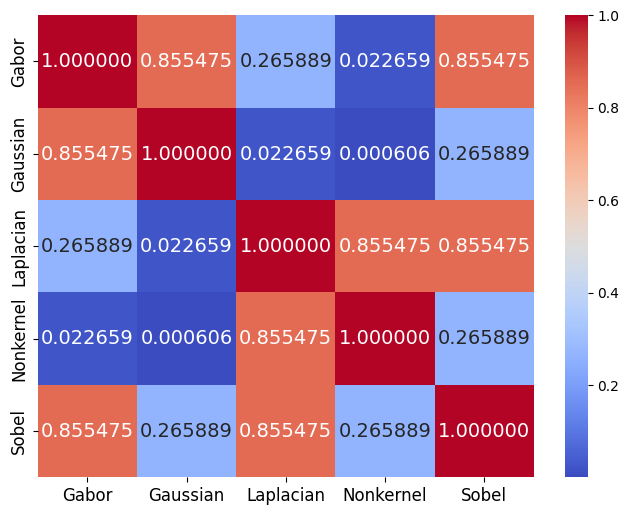

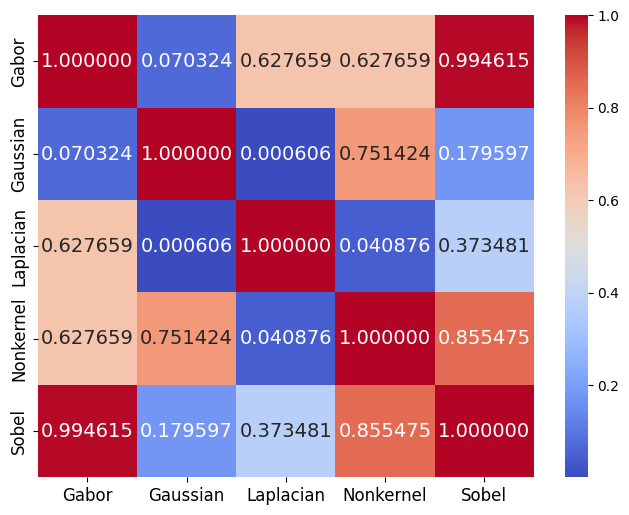

In [ ]:
import pandas as pd
import scikit_posthocs as sp

# Data LeNet per kernel
lenet_data = pd.DataFrame({
    'Gabor': [0.859093, 0.860898, 0.848928, 0.857827, 0.858938],
    'Gaussian': [0.873934, 0.871489, 0.857221, 0.871074, 0.863961],
    'Laplacian': [0.816248, 0.816583, 0.803696, 0.809344, 0.810350],
    'Nonkernel': [0.679617, 0.693544, 0.672608, 0.676987, 0.686309],
    'Sobel': [0.837521, 0.833959, 0.820097, 0.835513, 0.839009]
})

# Data Siamese per kernel
siamese_data = pd.DataFrame({
    'Gabor': [0.922582, 0.915660, 0.920118, 0.913041, 0.920680],
    'Gaussian': [0.930872, 0.931538, 0.929680, 0.929863, 0.928790],
    'Laplacian': [0.575189, 0.589634, 0.590966, 0.585545, 0.578059],
    'Nonkernel': [0.929645, 0.928390, 0.927050, 0.923178, 0.922587],
    'Sobel': [0.921906, 0.916932, 0.921716, 0.927486, 0.916143]
})

# VGG hanya punya 2 kernel, Nemenyi tidak bisa dipakai, jadi skip

print("Nemenyi post-hoc test LeNet:")
nemenyi_lenet = sp.posthoc_nemenyi_friedman(lenet_data)
print(nemenyi_lenet)

print("\nNemenyi post-hoc test Siamese:")
nemenyi_siamese = sp.posthoc_nemenyi_friedman(siamese_data)
print(nemenyi_siamese)
import seaborn as sns
import matplotlib.pyplot as plt


# Heatmap untuk LeNet
plt.figure(figsize=(8, 6))
sns.heatmap(
    nemenyi_lenet,
    annot=True,
    cmap="coolwarm",
    fmt=".6f",
    annot_kws={"size": 14}  # ukuran font angka dalam kotak
)
plt.xticks(fontsize=12)  # ukuran font label X
plt.yticks(fontsize=12)  # ukuran font label Y
plt.show()

# Heatmap untuk Siamese
plt.figure(figsize=(8, 6))
sns.heatmap(
    nemenyi_siamese,
    annot=True,
    cmap="coolwarm",
    fmt=".6f",
    annot_kws={"size": 14}
)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
